In [0]:
import pyspark 
import pandas as pd
import numpy as np
import os

In [0]:
df1 = spark.read.format("csv").option("header", "false").load("dbfs:/FileStore/shared_uploads/pratikdomadiya123@gmail.com/categories.csv")

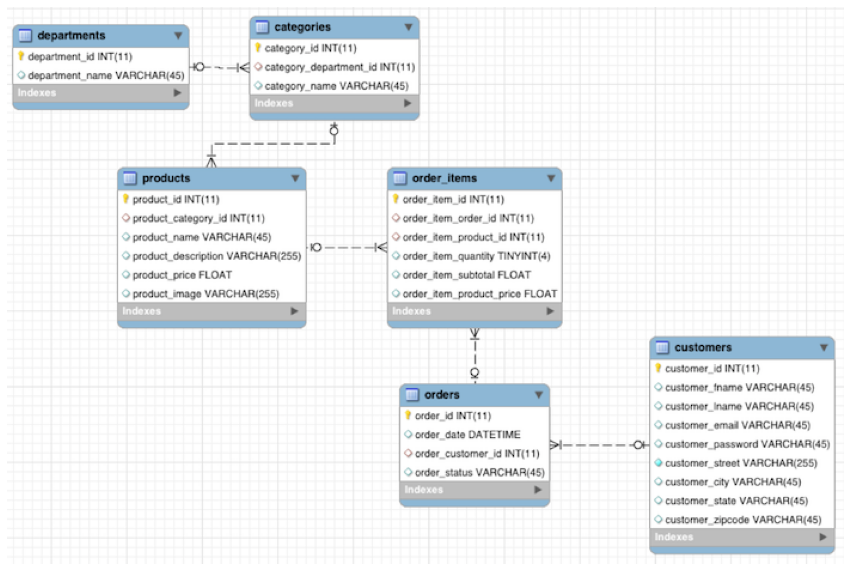

In [0]:
# Data base schema 
# Data Source : https://github.com/kishanpython/Data-Articles/tree/main/Article's%20Datasets/retails_data
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "https://anindya-saha.github.io/blog/_images/cloudera-retail-db.png"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
fig = plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis('off')
plt.show()

In [0]:
class Data:
    
    def __init__(self,filepath : str):
        self.path = filepath

    def get_data_from_csv_as_df(self,filename,df_schema):
        self.df=spark.read.format("csv").option("sep",",").option("header",False).schema(df_schema).load(self.path+filename)
        return self.df
    
    def create_df_with_new_schema(self,df_schema,data):
        new_df = spark.createDataFrame(data,schema=df_schema)
        return new_df
    
    
    


In [0]:

from pyspark.sql.types import *
dir_path = "dbfs:/FileStore/shared_uploads/pratikdomadiya123@gmail.com/"
data_source = Data(dir_path)

cust_schema = StructType([
    StructField('customer_id',       IntegerType(), nullable=True),
    StructField('customer_fname',    StringType(), nullable=True),
    StructField('customer_lname',    StringType(), nullable=True),
    StructField('customer_email',    StringType(), nullable=True),
    StructField('customer_password', StringType(), nullable=True),
    StructField('customer_street',   StringType(), nullable=True),
    StructField('customer_city',     StringType(), nullable=True),
    StructField('customer_state',    StringType(), nullable=True),
    StructField('customer_zipcode',  StringType(), nullable=True)])

customer_df = data_source.get_data_from_csv_as_df("customers.csv",cust_schema)

products_schema = StructType([
    StructField('product_id',          IntegerType(), nullable=True),
    StructField('product_category_id', IntegerType(), nullable=True),
    StructField('product_name',        StringType(), nullable=True),
    StructField('product_description', StringType(), nullable=True),
    StructField('product_price',       FloatType(), nullable=True),
    StructField('product_image',       StringType(), nullable=True)])
product_df = data_source.get_data_from_csv_as_df('products.csv',products_schema)

categories_schema = StructType([
    StructField('category_id',            IntegerType(), nullable=True),
    StructField('category_department_id', IntegerType(), nullable=True),
    StructField('category_name',          StringType(), nullable=True)])
category_df = data_source.get_data_from_csv_as_df("categories.csv",categories_schema)

orders_schema = StructType([
    StructField('order_id',          IntegerType(), nullable=True),
    StructField('order_date',        StringType(), nullable=True),
    StructField('order_customer_id', IntegerType(), nullable=True),
    StructField('order_status',      StringType(), nullable=True)])

orders_df = data_source.get_data_from_csv_as_df('orders.csv',orders_schema)

departments_schema = StructType([
    StructField('department_id',   IntegerType(), nullable=True),
    StructField('department_name', StringType(), nullable=True)])

department_df = data_source.get_data_from_csv_as_df("departments.csv",departments_schema)

order_items_schema = StructType([
    StructField('order_item_id',            IntegerType(), nullable=True),
    StructField('order_item_order_id',      IntegerType(), nullable=True),
    StructField('order_item_product_id',    IntegerType(), nullable=True),
    StructField('order_item_quantity',      IntegerType(), nullable=True),
    StructField('order_item_subtotal',      FloatType(), nullable=True),
    StructField('order_item_product_price', FloatType(), nullable=True)])

order_items_df = data_source.get_data_from_csv_as_df('order_items.csv',order_items_schema)

In [0]:
order_items_df.show()

+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
|            3|                  2|                  502|                  5|              250.0|                    50.0|
|            4|                  2|                  403|                  1|             129.99|                  129.99|
|            5|                  4|                  897|                  2|              49.98|                   24.99|
|            6| 

In [0]:
(orders_df.schema)

Out[141]: StructType([StructField('order_id', IntegerType(), True), StructField('order_date', StringType(), True), StructField('order_customer_id', IntegerType(), True), StructField('order_status', StringType(), True)])

In [0]:
orders_df.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- order_date: string (nullable = true)
 |-- order_customer_id: integer (nullable = true)
 |-- order_status: string (nullable = true)



In [0]:
order_items_df.dtypes

Out[143]: [('order_item_id', 'int'),
 ('order_item_order_id', 'int'),
 ('order_item_product_id', 'int'),
 ('order_item_quantity', 'int'),
 ('order_item_subtotal', 'float'),
 ('order_item_product_price', 'float')]

In [0]:
# Checking for null values in the DataFrame
from pyspark.sql.functions import col,sum
# null_counts = order_items_df.select(*(sum(col(order_item_subtotal).isNull().cast("integer")).alias(column) for column in order_items_df.columns)).toPandas()
null_counts = order_items_df.agg(*(sum(col(column).isNull().cast("integer")).alias(column) for column in order_items_df.columns)).show()

for column in order_items_df.columns:
    print(column)
    print(order_items_df.agg(sum(col(column).isNull().cast("integer"))).show())
# print(null_counts.show())


+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            0|                  0|                    0|                  0|                  0|                       0|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+

order_item_id
+-----------------------------------------+
|sum(CAST((order_item_id IS NULL) AS INT))|
+-----------------------------------------+
|                                        0|
+-----------------------------------------+

None
order_item_order_id
+-----------------------------------------------+
|sum(CAST((order_item_order_id IS NULL) AS INT))|
+-----------------------

In [0]:
from pyspark.sql.functions import countDistinct
# avg_revenue = orders_df.join(order_items_df,orders_df['order_id']==order_items_df["order_item_order_id"],"inner").select('order_item_subtotal','order_item_order_id').select((sum('order_item_subtotal') / countDistinct('order_item_order_id')).alias('avg_rev_per_order'))

avg_revenue = orders_df.join(order_items_df,on=order_items_df['order_item_order_id']==orders_df['order_id'],how='inner').select('order_item_subtotal','order_item_order_id').select((sum('order_item_subtotal') / countDistinct('order_item_order_id')).alias('average per order'))
print(avg_revenue)

DataFrame[average per order: double]


In [0]:
avg_revenue.show(5)

+-----------------+
|average per order|
+-----------------+
|597.6322996016944|
+-----------------+



In [0]:
avg_revenue_per_day = orders_df.join(order_items_df, orders_df['order_id']==order_items_df['order_item_order_id'],"inner").select('order_date',"order_item_subtotal","order_item_order_id").groupBy('order_date').agg((sum('order_item_subtotal') / countDistinct('order_item_order_id')).alias('avg_rev_per_order')).orderBy('order_date')

In [0]:
avg_revenue_per_day.show(10)

+--------------------+-----------------+
|          order_date|avg_rev_per_order|
+--------------------+-----------------+
|2013-07-25 00:00:...|587.5330286848134|
|2013-07-26 00:00:...|585.9234878147109|
|2013-07-27 00:00:...|577.5676682063512|
|2013-07-28 00:00:...|551.4119109020958|
|2013-07-29 00:00:...|635.5883909684641|
|2013-07-30 00:00:...|564.5363838698838|
|2013-07-31 00:00:...|630.9955146643533|
|2013-08-01 00:00:...|608.4982189502356|
|2013-08-02 00:00:...|587.8871075517388|
|2013-08-03 00:00:...|599.1628419048382|
+--------------------+-----------------+
only showing top 10 rows



In [0]:
from pyspark.sql.functions import *

avg_revenue_per_month = orders_df.join(order_items_df, orders_df['order_id']==order_items_df["order_item_order_id"],"inner").select('order_date','order_item_subtotal','order_item_order_id').withColumn('date',to_date(col("order_date").cast("timestamp"))).withColumn('month',month(col('date'))).withColumn('year',year(col("date"))).groupBy('month','year').agg((sum('order_item_subtotal')/countDistinct('order_item_order_id')).alias('avg_per_months')).orderBy('month')

'''
to_date(col("order_date")) --- extract date from timestamp
.cast("timestamp") --- convert dtype to timestamp type
month(col('date') --- extract month from date 
year(col('date')) --- extract year from date 

'''

Out[149]: '\nto_date(col("order_date")) --- extract date from timestamp\n.cast("timestamp") --- convert dtype to timestamp type\nmonth(col(\'date\') --- extract month from date \nyear(col(\'date\')) --- extract year from date \n\n'

In [0]:
avg_revenue_per_month.show(5)

+-----+----+-----------------+
|month|year|   avg_per_months|
+-----+----+-----------------+
|    1|2014|593.9169510714316|
|    2|2014|594.3665700359651|
|    3|2014|598.2219991498606|
|    4|2014|592.2357846006415|
|    5|2014|605.0721480929196|
+-----+----+-----------------+
only showing top 5 rows



In [0]:
top_performer_dept = orders_df.filter((orders_df['order_status']!='CANCELED') & (orders_df['order_status']!='SUSPECTED_FRAUD')).join(order_items_df,orders_df['order_id']==order_items_df['order_item_id'],"inner").join(product_df,order_items_df['order_item_product_id']==product_df['product_id'],"inner").join(category_df,product_df['product_category_id']==category_df['category_id'],"inner").join(department_df,category_df['category_department_id']==department_df['department_id']).select('department_name', year(col('order_date')).alias('order_year'),'order_item_subtotal').groupBy('department_name','order_year').agg(sum('order_item_subtotal').alias('total_sale')).orderBy('department_name', 'order_year')

In [0]:
top_performer_dept.show(20)

+---------------+----------+------------------+
|department_name|order_year|        total_sale|
+---------------+----------+------------------+
|        Apparel|      2013| 1228357.661014557|
|        Apparel|      2014|1542737.8920059204|
|       Fan Shop|      2013| 2892575.926765442|
|       Fan Shop|      2014|  3622136.79463768|
|        Fitness|      2013| 39029.87055015564|
|        Fitness|      2014| 42314.46055030823|
|       Footwear|      2013| 681358.4096031189|
|       Footwear|      2014| 856210.4195404053|
|           Golf|      2013| 799596.7039222717|
|           Golf|      2014| 979920.7547073364|
|       Outdoors|      2013|136317.57013893127|
|       Outdoors|      2014|164361.87997627258|
+---------------+----------+------------------+



In [0]:
product_df.printSchema()

root
 |-- product_id: integer (nullable = true)
 |-- product_category_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- product_description: string (nullable = true)
 |-- product_price: float (nullable = true)
 |-- product_image: string (nullable = true)



In [0]:
# find out the most expensive item in catalog

max_item_price = product_df.select(max('product_price')).collect()[0][0]
print(expensive_item)
max_expe_item = product_df.select('product_id','product_category_id','product_name','product_price').filter(col('product_price')==max_item_price)
print(max_expe_item.show())


DataFrame[max(product_price): float]
+----------+-------------------+-------------------+-------------+
|product_id|product_category_id|       product_name|product_price|
+----------+-------------------+-------------------+-------------+
|       208|                 10|SOLE E35 Elliptical|      1999.99|
+----------+-------------------+-------------------+-------------+

None


In [0]:
# which product generated the most revenue

most_rev_gen_prod = product_df.join(order_items_df, on=product_df['product_id']==order_items_df['order_item_product_id'],how="inner").select('product_id','product_name','order_item_subtotal').groupBy('product_id','product_name').agg(sum('order_item_subtotal').cast("integer").alias('total_revenue')).orderBy(desc('total_revenue')).limit(1)
print(most_rev_gen_prod.show())

+----------+--------------------+-------------+
|product_id|        product_name|total_revenue|
+----------+--------------------+-------------+
|      1004|Field & Stream Sp...|      6929653|
+----------+--------------------+-------------+

None


In [0]:
# top ordered categories in retail dataset

top_ordered_category = order_items_df.join(product_df,on=product_df['product_id']==order_items_df['order_item_product_id'],how="inner").join(category_df,on=category_df['category_id']==product_df['product_category_id']).select('order_item_product_id','product_category_id','category_name','order_item_quantity').groupBy('category_name').agg(sum('order_item_quantity').alias('total_order')).orderBy(desc('total_order'))

print(top_ordered_category.show())

+--------------------+-----------+
|       category_name|total_order|
+--------------------+-----------+
|              Cleats|      73734|
|     Women's Apparel|      62956|
|Indoor/Outdoor Games|      57803|
|    Cardio Equipment|      37587|
|       Shop By Sport|      32726|
|      Men's Footwear|      22246|
|             Fishing|      17325|
|        Water Sports|      15540|
|    Camping & Hiking|      13729|
|         Electronics|       9436|
|         Accessories|       5349|
|          Golf Balls|       4384|
|      Girls' Apparel|       3615|
|         Golf Gloves|       2961|
|            Trade-In|       2822|
| Baseball & Softball|       1785|
|              Hockey|       1711|
|          Golf Shoes|       1444|
|        Boxing & MMA|       1265|
|  Hunting & Shooting|       1239|
+--------------------+-----------+
only showing top 20 rows

None


In [0]:
# Find count of orders based on their status
orders_per_status = orders_df.groupBy('order_status').agg(count(col("order_status")).alias('total_order'))

print(orders_per_status.show())

+---------------+-----------+
|   order_status|total_order|
+---------------+-----------+
|PENDING_PAYMENT|      15030|
|       COMPLETE|      22899|
|        ON_HOLD|       3798|
| PAYMENT_REVIEW|        729|
|     PROCESSING|       8275|
|         CLOSED|       7556|
|SUSPECTED_FRAUD|       1558|
|        PENDING|       7610|
|       CANCELED|       1428|
+---------------+-----------+

None


In [0]:
# orders status : "cancelled" and order_amount > 1000

res_df = orders_df.filter(col('order_status')=='CANCELED').join(order_items_df, on= orders_df['order_id']==order_items_df['order_item_order_id'],how="inner").groupBy('order_id','order_date','order_customer_id','order_status').agg(sum(col('order_item_subtotal')).alias('total_order')).filter(col('total_order')>=1000).orderBy('order_id')
print(res_df.show())

+--------+--------------------+-----------------+------------+------------------+
|order_id|          order_date|order_customer_id|order_status|       total_order|
+--------+--------------------+-----------------+------------+------------------+
|     753|2013-07-29 00:00:...|             5094|    CANCELED|           1129.75|
|    2012|2013-08-04 00:00:...|             5165|    CANCELED|1499.8600311279297|
|    2144|2013-08-05 00:00:...|             7932|    CANCELED| 1099.900032043457|
|    2189|2013-08-06 00:00:...|             6829|    CANCELED|1029.9400253295898|
|    2271|2013-08-06 00:00:...|             7603|    CANCELED|1229.9300231933594|
|    2754|2013-08-09 00:00:...|             8946|    CANCELED|1109.9500274658203|
|    3551|2013-08-14 00:00:...|             5363|    CANCELED|1299.8700408935547|
|    4354|2013-08-20 00:00:...|             7268|    CANCELED|1047.9000244140625|
|    4801|2013-08-23 00:00:...|            11630|    CANCELED|1016.9500217437744|
|    5331|2013-0

In [0]:
# customer with more than 5 orders in august 2013
# Note : remember if your query containing join and filter operations then apply filter first and then apply join as filter operation takes little time to execute compare to join 
# join orders of the table doesn't matter at all , you will get the same result by changing the order of the join operations.
cust_more_than_5_ord = orders_df.filter((col('order_status')!= 'CANCELED')&(col('order_status')!= 'SUSPECTED_FRAUD')&(month(col('order_date'))=='8') & (year(col('order_date'))=='2013')).join(customer_df, on=customer_df['customer_id']==orders_df['order_customer_id']).join(order_items_df,on=orders_df['order_id']==order_items_df['order_item_order_id'],how="inner").select('order_id','customer_id','customer_fname','customer_lname').groupBy('customer_id','customer_fname','customer_lname').agg(count('order_id').alias('total_orders')).where(col('total_orders')>=5).orderBy(desc('total_orders'))
print(cust_more_than_5_ord.show())

+-----------+--------------+--------------+------------+
|customer_id|customer_fname|customer_lname|total_orders|
+-----------+--------------+--------------+------------+
|        791|          Mary|         Smith|          15|
|       6088|          Mary|        Brooks|          14|
|       9371|          Mary|     Patterson|          14|
|       5047|       Shirley|     Whitehead|          14|
|       5477|          Mary|         Smith|          14|
|       8069|       Tiffany|      Mcdaniel|          13|
|       5865|         David|     Middleton|          13|
|       9575|          John|      Richards|          13|
|       4582|         Brian|         House|          13|
|       3295|         Maria|        Joseph|          13|
|       3536|          Mary|        Tanner|          13|
|       9494|        Robert|       Gilmore|          12|
|       9657|           Roy|      Williams|          12|
|       5992|          Mary|         Cross|          12|
|      12362|          Mary|   